## Imports

In [1]:
import graphs
import numpy              as np
import pandas             as pd
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

## Table Of Contents

- [Continuous Data](#Continuous-Data)
    - [Histograms](#Histograms)
    - [KDE Plots](#KDE-Plots)
    - [Box Plots](#Box-Plots)
    - [Violin Plots](#Violin-Plots)
    - [Regression Plots](#Regression-Plots)
    - [Heat Maps](#Heat-Maps)
    - [Residual Plots](#Residual-Plots)
    
- [Categorical Data](#Categorical-Data)
    - [Bar Plots](#Bar-Plots)
    - [Count Plots](#Count-Plots)

## Reading In The Data

The data I will be using for these examples is the data I used for my capstone project at General Assembly: it is a dataset of MRI measurements from patients who have had heart attacks.  I will also be using a set of predictions from my capstone to illustrate the residual plots.

The project can be found [here](https://github.com/a-bergman/DSI-Capstone).

In [2]:
heart = pd.read_csv("../Examples/Data/mri_cleaned.csv")
preds = pd.read_csv("../Examples/Data/engineered_model_predictions.csv")

## <center>Continuous Data</center>

### Histograms

A histogram looks at a single _continuous_ values: it counts the occurence of each value and thus plots the distribution of values in a data set.

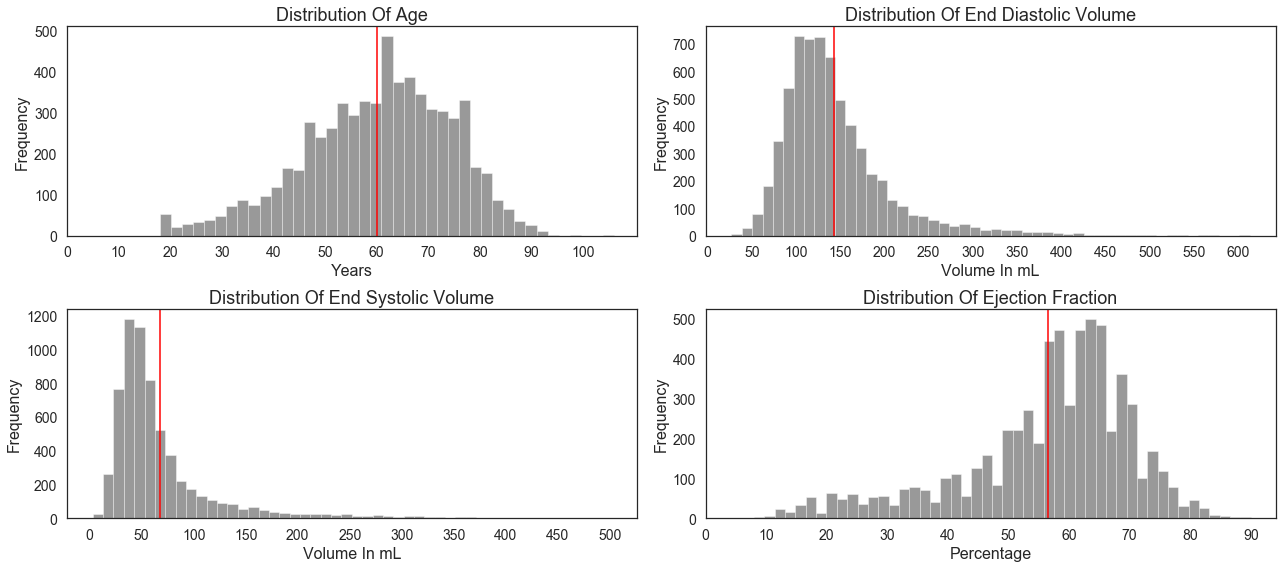

In [3]:
graphs.histograms(df      = heart,
                  columns = ["age", "lvedv", "lvesv", "lvef"],
                  titles  = ["Age", "End Diastolic Volume", 
                            "End Systolic Volume", "Ejection Fraction"],
                  labels  = ["Years", "Volume In mL", "Volume In mL", "Percentage"],
                  ylabel  = "Frequency",
                  ticks   = [np.arange(0,110,10), np.arange(0,625,50),
                             np.arange(0,525,50), np.arange(0,100,10)],
                  dim     = (18,8),
                  row     = 2,
                  col     = 2)

### KDE Plots

A KDE (kernel density estimate) is similar to a histogram, but is subtlely different.  A KDE plot estimates the probability density function for a continuous variable, but does not make an assumption about the underlying distribution of the data.  The graphs are smooth because they are making estimates, not plotting the actual values.

More information can be found [here](https://en.wikipedia.org/wiki/Kernel_density_estimation)

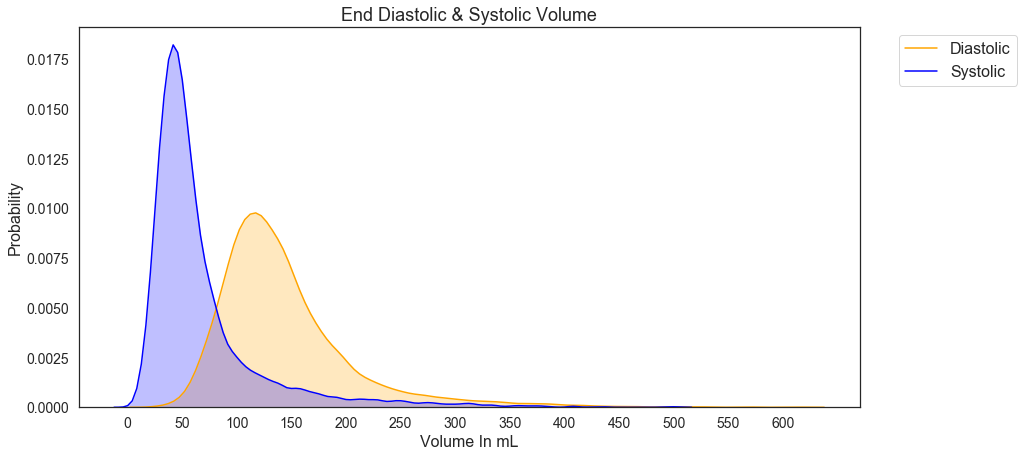

In [4]:
graphs.kdeplots(df     = heart,
                cols   = ["lvedv", "lvesv"],
                title  = "End Diastolic & Systolic Volume",
                dim    = (14,7),
                colors = ["orange", "blue"],
                labels = ["Diastolic", "Systolic"],
                xlabel = "Volume In mL",
                ylabel = "Probability",
                ticks  = np.arange(0,650,50),
                shade  = True)

### Box Plots

A box plot is another way of visualizing continuous data and are useful because they give a summary of the data: the bars on the plot give us the minimum, 25<sup>th</sup>, median, 75<sup>th</sup>, maximum, and any outliers are plotted as dots or points.  In addition to that summary, these plots are useful because they indicate the presence and degree of outliers.

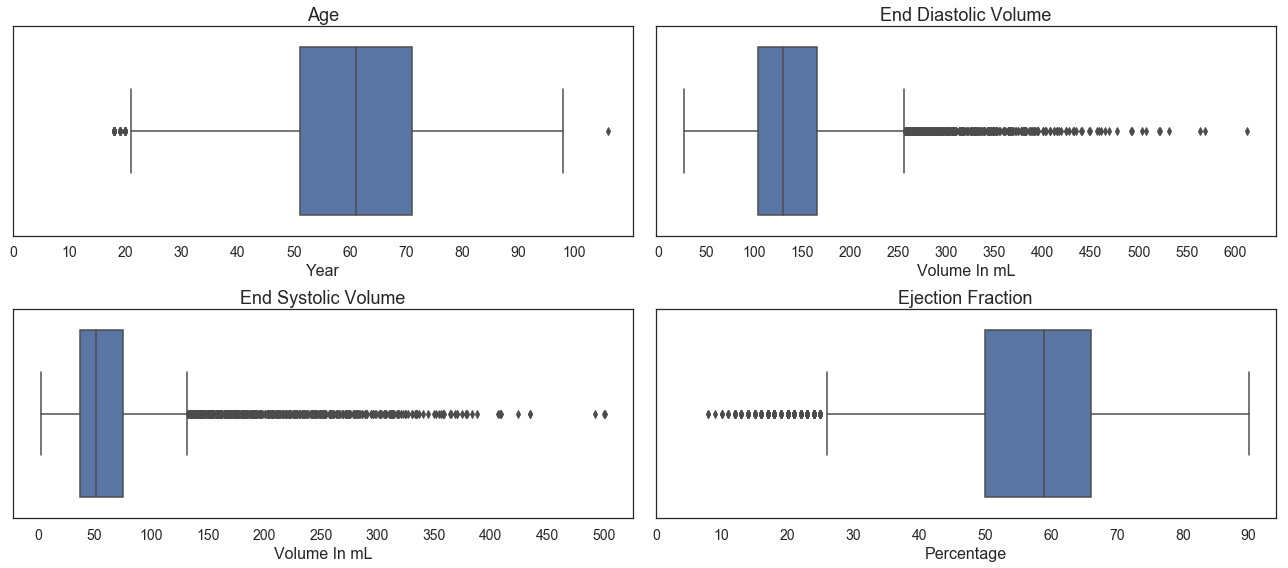

In [5]:
graphs.boxplots(df      = heart,
                columns = ["age", "lvedv", "lvesv", "lvef"],
                titles  = ["Age", "End Diastolic Volume",
                           "End Systolic Volume", "Ejection Fraction"],
                labels  = ["Year", "Volume In mL", 
                           "Volume In mL", "Percentage"],
                ticks   = [np.arange(0,110,10), np.arange(0,650,50),
                           np.arange(0,550,50), np.arange(0,100,10)],
                dim     = (18,8),
                row     = 2,
                col     = 2)

### Violin Plots

A violin plot does the same as a box plot but it adds the probability density of the data on each side of the line.  This adds the benefit of showing the distribution of the data in relation to the five digit summary of the box plot.

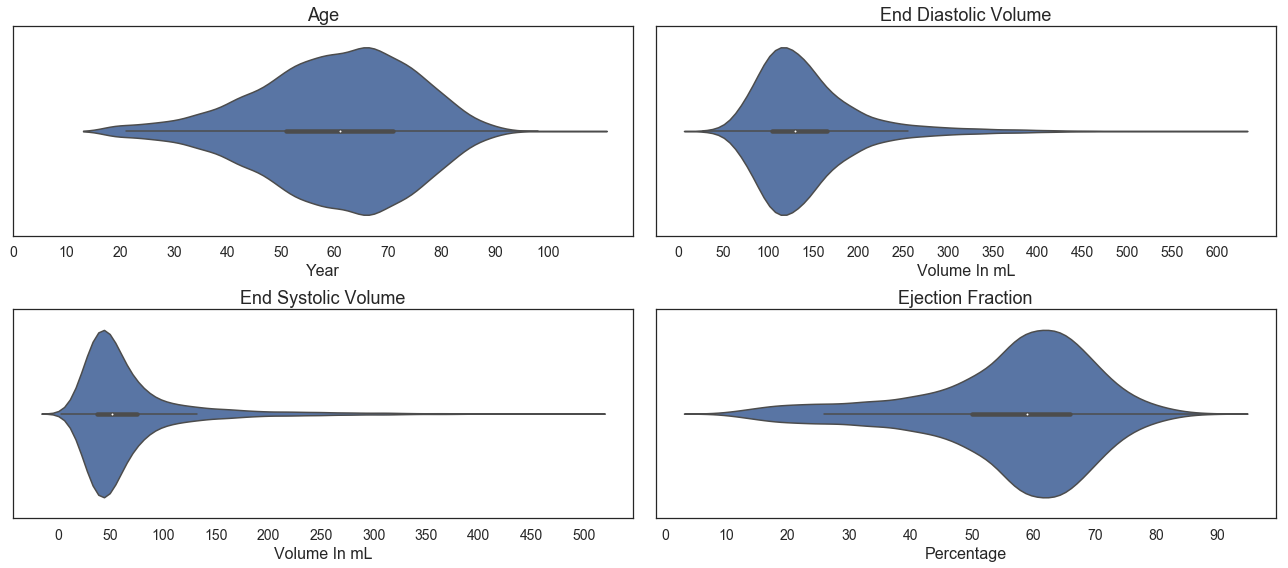

In [6]:
graphs.violinplots(df      = heart,
                   columns = ["age", "lvedv", "lvesv", "lvef"],
                   titles  = ["Age", "End Diastolic Volume",
                              "End Systolic Volume", "Ejection Fraction"],
                   labels  = ["Year", "Volume In mL", 
                              "Volume In mL", "Percentage"],
                   ticks   = [np.arange(0,110,10), np.arange(0,650,50),
                              np.arange(0,550,50), np.arange(0,100,10)],
                   dim     = (18,8),
                   row     = 2,
                   col     = 2)

### Regression Plots

A scatter plot is a way of correlation the relationship between two continuous variables, usually the target variable and a feature in the model and in doing so we can determine if our variables have a linear relationship which is important for many modeling techniques.

A regression plot is the same but it adds a line of best fit to the data which makes visualizing the correlation between two variables easier.

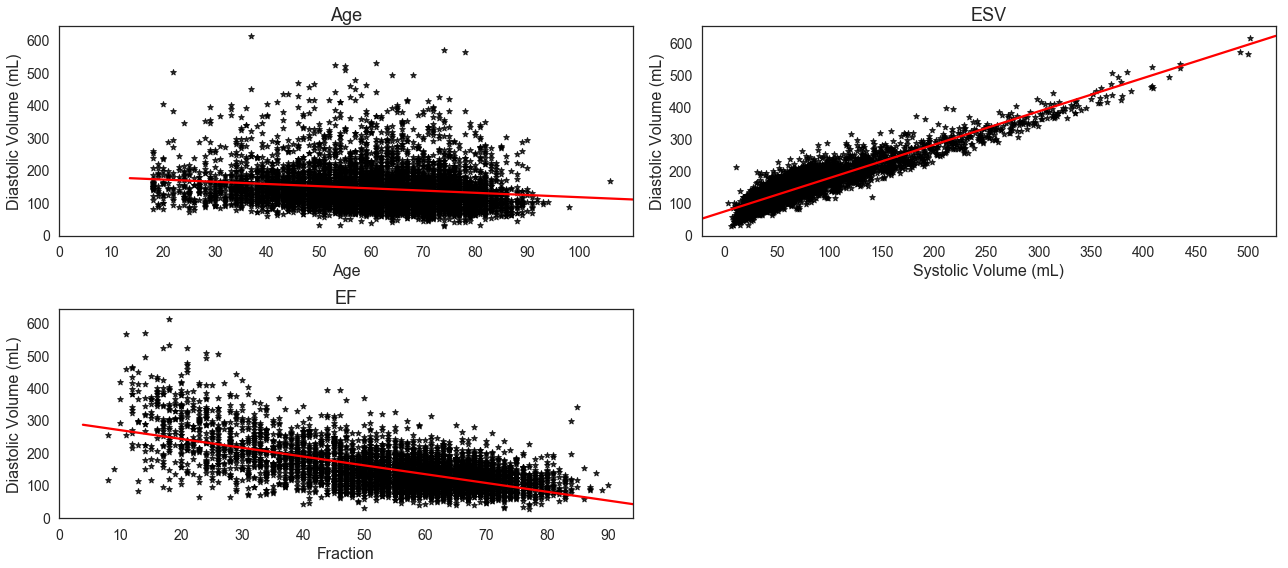

In [7]:
graphs.regressionplots(df      = heart,
                       columns = ["age", "lvesv", "lvef"],
                       y       = "lvedv",
                       titles  = ["Age", "ESV", "EF"],
                       labels  = ["Age", "Systolic Volume (mL)", "Fraction"],
                       ylabel  = "Diastolic Volume (mL)",
                       ticks   = [np.arange(0,110,10), np.arange(0,550,50),
                                  np.arange(0,100,10)],
                       dim     = (18,8),
                       row     = 2,
                       col     = 2,)

### Heat Maps

A heat map shows the correlation between continuous variables in a shaded matrix.

In this function, the matrix is "split" meaning that it does not duplicate each correlation across the diagonal and does not indicate the correlation between identical variables.

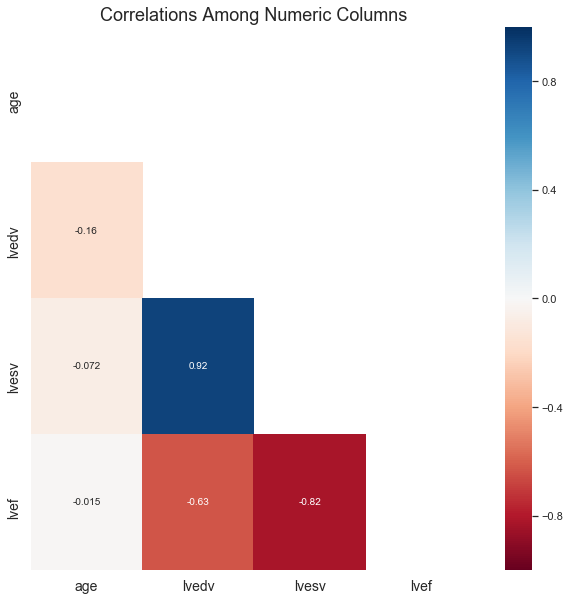

In [8]:
graphs.heatmap(df      = heart,
               columns = ["age", "lvedv","lvesv", "lvef"],
               dim     = (10,10),
               title   = "Correlations Among Numeric Columns",
               vmin    = -1,
               vmax    = 1)

### Residual Plots

Residual plots are generated after generating predictions with a model and represents the difference between each predicted and generated value.  These graphs are used to detect heteroscedasticity in the residuals, i.e. if there is a pattern to the residuals: a pattern indicates that a model is not performing equally across all data.  This is a particular concern in linear regression because it indicates that one of the assumptions in linear regression, independence of errors, is being violated.

For each plot this function makes, the x-axis represents true values and the y-axis represents predicted values.

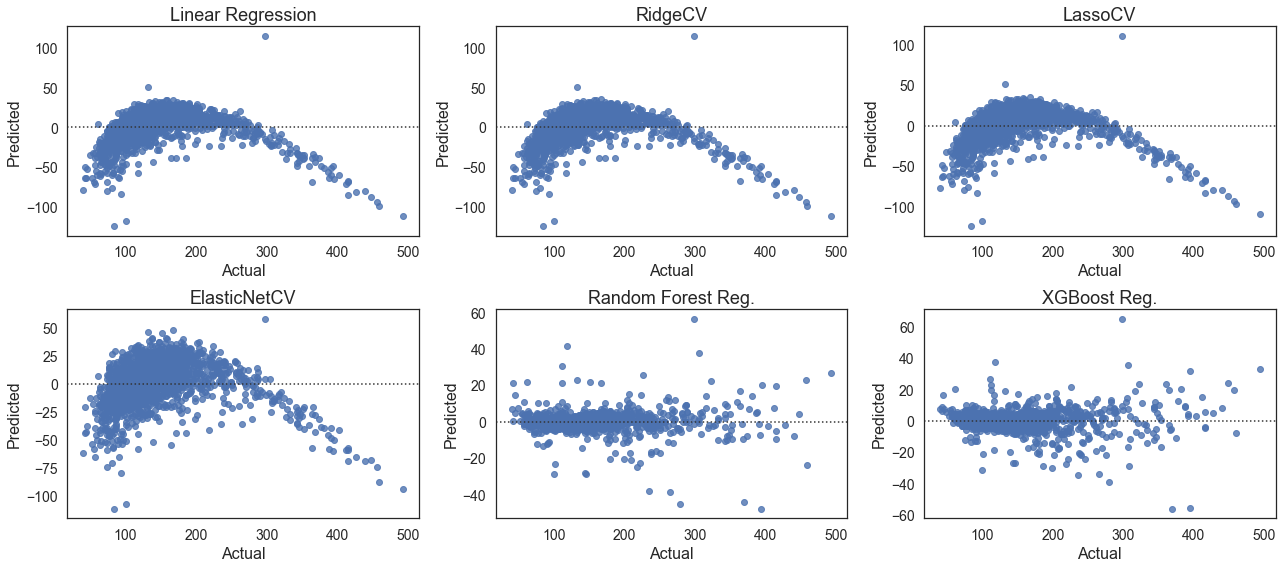

In [9]:
graphs.residualplots(df      = preds,
                     x       = "Actual",
                     columns = ["Linear Reg.", "RidgeCV","LassoCV", "ElasticNetCV",
                                "Random Forest Reg.", "XGBoost Reg."],
                     titles  = ["Linear Regression", "RidgeCV","LassoCV", "ElasticNetCV", 
                                "Random Forest Reg.", "XGBoost Reg."],
                     dim     = (18,8),
                     row     = 2,
                     col     = 3,
                     xlabel  = "Actual",
                     ylabel  = "Predicted")

## <center>Categorical Data</center>

### Bar Plots

A Seaborn bar plot returns a measure of central tendency, by default the mean, of a categorical variable which is why it requires an x and y variable.

For a more classic bar plot, use the `countplots` function.

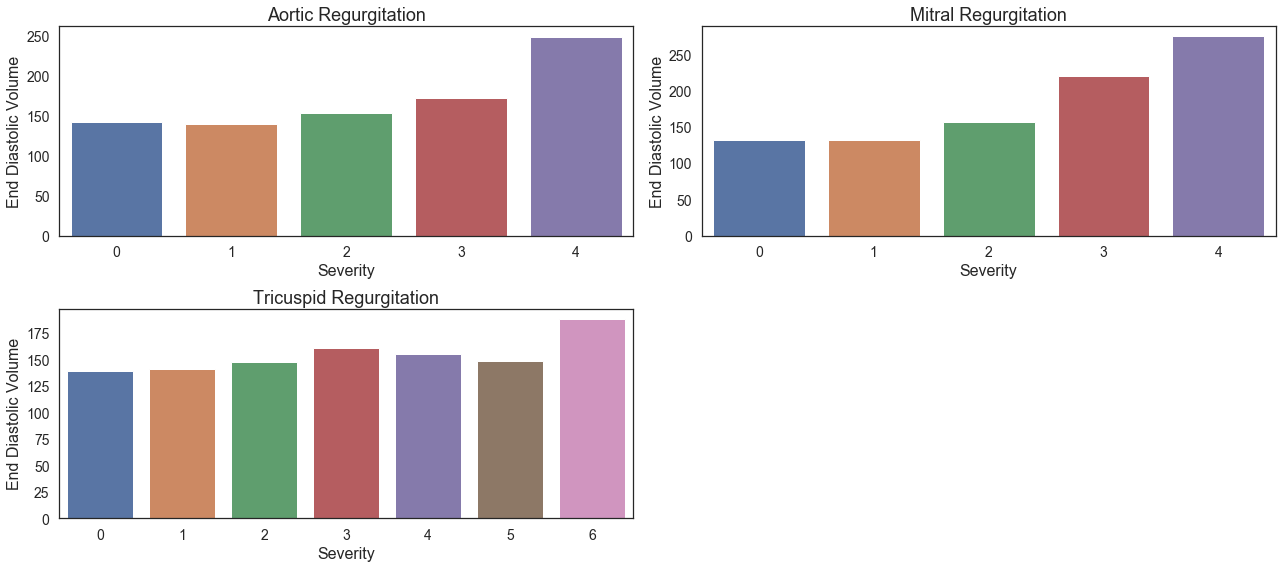

In [10]:
graphs.barplots(df      = heart,
                columns = ["aortic_reg", "mitral_reg", "tricusp_reg"],
                y       = "lvedv",
                labels  = ["Severity", "Severity", "Severity"],
                ylabel  = "End Diastolic Volume",
                titles  = ["Aortic Regurgitation", "Mitral Regurgitation", 
                          "Tricuspid Regurgitation"],
                dim     = (18,8),
                row     = 2,
                col     = 2)

### Count Plots

The count plot is simpler because it counts the frequency of a category in a data set.

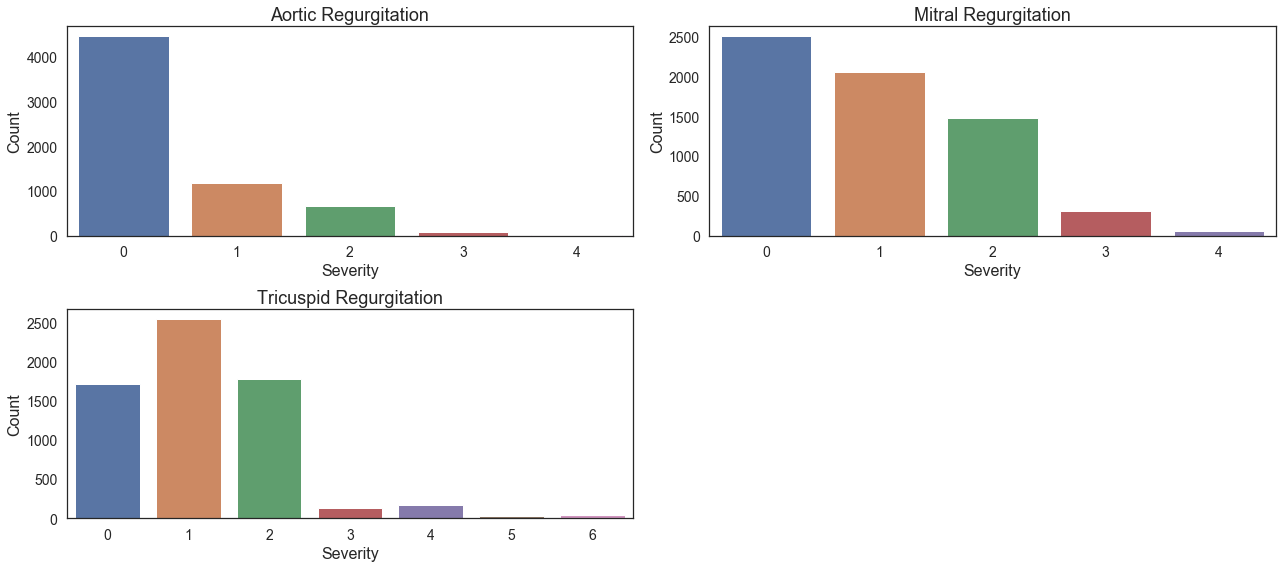

In [11]:
graphs.countplots(df      = heart,
                  columns = ["aortic_reg", "mitral_reg", "tricusp_reg"],
                  titles  = ["Aortic Regurgitation", "Mitral Regurgitation", 
                             "Tricuspid Regurgitation"],
                  labels  = ["Severity", "Severity", "Severity"],
                  ylabel  = "Count",
                  dim     = (18,8),
                  row     = 2,
                  col     = 2)

[Top](#Table-Of-Contents)